Task 2 : Perform data cleaning  and exploratory data analysis(EDA) on dataset of your choice,such as Titanic dataset from kaggle .
Explore the relationship between the variables and identify patterns and trends in the  data.**


In [1]:
import pandas as pd

# Load the datasets

train_df = pd.read_csv("https://raw.githubusercontent.com/arya1dragneel/SCT_TrackCode_TaskNumber./refs/heads/main/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/arya1dragneel/SCT_TrackCode_TaskNumber./refs/heads/main/test.csv")

# Display basic info
print("Train Dataset Info:")
train_df.info()
print("\nTest Dataset Info:")
test_df.info()

# Display first few rows
print("\nTrain Dataset Preview:")
print(train_df.head())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerI

In [2]:
# Fill missing Age with median
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

# Fill missing Embarked with mode (most common value)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

# Fill missing Fare in test dataset with median
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)


In [3]:
train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
test_df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)


In [4]:
# Convert Sex to numeric (0 = Male, 1 = Female)
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})

# Convert Embarked to numeric using one-hot encoding
train_df = pd.get_dummies(train_df, columns=["Embarked"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Embarked"], drop_first=True)


In [5]:
train_df.to_csv("cleaned_train.csv", index=False)
test_df.to_csv("cleaned_test.csv", index=False)

print("Data Cleaning Completed! Cleaned files saved.")


Data Cleaning Completed! Cleaned files saved.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
train_df = pd.read_csv("cleaned_train.csv")

# Set style for seaborn
sns.set_style("whitegrid")


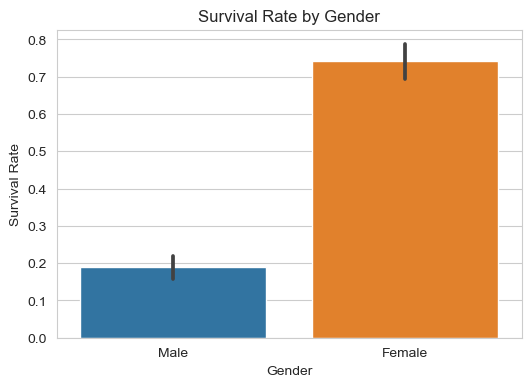

In [7]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()


In [8]:
print("female has high survival rate than male")

female has high survival rate than male


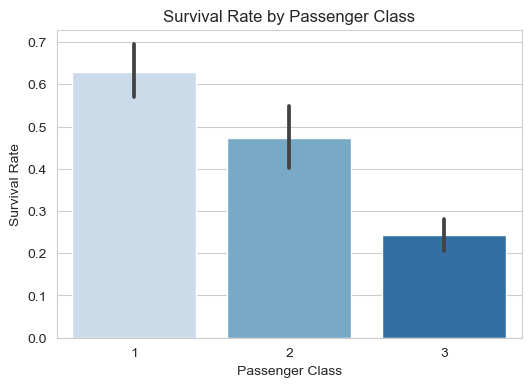

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=train_df, palette="Blues")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.show()


In [10]:
print("First class passenger has high chance of survival")

First class passenger has high chance of survival


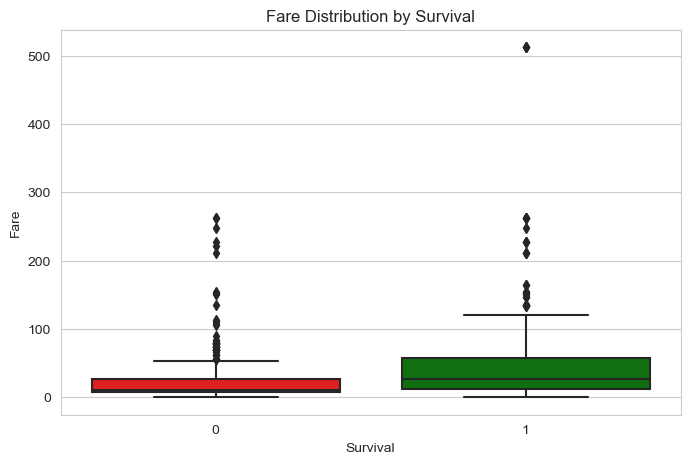

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Survived", y="Fare", data=train_df, palette=["red", "green"])
plt.xlabel("Survival")
plt.ylabel("Fare")
plt.title("Fare Distribution by Survival")
plt.show()


In [12]:
print("Survivors generally paid higher fares, indicating that wealthier passengers had a better chance of survival.")

Survivors generally paid higher fares, indicating that wealthier passengers had a better chance of survival.


In [14]:
train_df.to_csv("final_cleaned_train.csv", index=False)
print("EDA Completed! Cleaned dataset is saved as 'final_cleaned_train.csv'.")


EDA Completed! Cleaned dataset is saved as 'final_cleaned_train.csv'.


In [16]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True
887,1,1,1,19.0,0,0,30.0000,False,True
888,0,3,1,28.0,1,2,23.4500,False,True
889,1,1,0,26.0,0,0,30.0000,False,False


In [17]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,True,False
1,893,3,1,47.0,1,0,7.0000,False,True
2,894,2,0,62.0,0,0,9.6875,True,False
3,895,3,0,27.0,0,0,8.6625,False,True
4,896,3,1,22.0,1,1,12.2875,False,True
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,False,True
414,1306,1,1,39.0,0,0,108.9000,False,False
415,1307,3,0,38.5,0,0,7.2500,False,True
416,1308,3,0,27.0,0,0,8.0500,False,True


In [21]:
#conclusion 
print("Women had a higher survival rate than men.")
print("First-class passengers had a better chance of survival.")
print("Younger passengers were more likely to survive.")
print("Higher ticket prices were associated with higher survival rates.")
print("Embarkation from Cherbourg (C) was linked to a better survival chance.")

Women had a higher survival rate than men.
First-class passengers had a better chance of survival.
Younger passengers were more likely to survive.
Higher ticket prices were associated with higher survival rates.
Embarkation from Cherbourg (C) was linked to a better survival chance.
